<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **8:00PM, Sunday, May 23th**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this piece:
- **LO1** - Demonstrate a conceptual understanding of database systems and architecture, data models and declarative query languages
- **LO2** - Define, query and manipulate a relational database
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems
- **LO7** - Identify potential pitfalls, and social and ethical implications of data science
- **LO8** - Explain key security concepts and the use of cryptographic techniques, digital signatures and PKI in security


## Submission

You need to submit the following items:
- The notebook `Assignment-2.ipynb` 
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* Your code answers will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 
* Your written answers will be marked on the **correctness**, **depth** and **clarity** of your written answers. If your marker cannot understand your answer, marks may be deducted
* Before submitting, restart the kernel in Jupiter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

## Enter Your Student ID Below:

## Introduction

You have three (3) datasets to work with in this assignment, broken down as follows:

- Questions 1 and 2 - Transcoding Dataset
- Question 3 - SDSS
- Question 4 - SuperStore Database

Once again, the  dataset is a sizable dataset (roughly 8000 rows and 24 columns), so it is wise to consider your code in terms of complexity to ensure it doesn't take 30 minutes to run a single line.

Further reading on the datasets can be found in the following locations:
- [Transcoding Dataset.md](./data/cve/about.md)
- [Northwind Database.md](./data/bikestores/about.md)
- [SDSS Description](./data/SDSS_Description.txt)

****

In [1]:
# Code Imports
# Every Lab import is here, you may need to uncomment additional items as necessary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlite3 import Error

from scipy import stats
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours
from sklearn.preprocessing import LabelEncoder          # encooding variables
from sklearn.preprocessing import StandardScaler        # encooding variables
from sklearn.model_selection import train_test_split    # testing our models
from sklearn.preprocessing import OneHotEncoder         # nominal variable
from sklearn.metrics import confusion_matrix            # scoring
from sklearn.tree import DecisionTreeClassifier         # decision trees
from sklearn.tree import DecisionTreeRegressor          # decision trees
from sklearn import tree                                # decision trees
from sklearn.decomposition import PCA                   # PCA 
from sklearn.cluster import KMeans                      # KMeans Clustering
from sklearn.linear_model import LinearRegression

In [2]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that some justification as to WHY you are using them should be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

****
## Q1: Clustering Videos for Transcoding <span style= 'float: right;'><b>[25 marks]</b></span>
Building off the dataset you initially encountered in Assignment 1, the Transcoding dataset has made a return for the following question.

The following question is designed to get you to load and process data and implement a clustering model for the given scenario below. You have been introduced to `KMeans` clustering in the lectures and labs, and this would therefore be the assumed clustering method, although you are welcome to supplement this with other clustering methods from the `sklearn` package as you desire.

You will first be asked to import and pre-process the data ready to implement a clustering model. Then, you are on your own in the world of clustering. Good luck!

### 1.1 Preprocessing <span style= 'float: right;'><b>[5 marks]</b></span>

To start, bring in the data and get it ready for clustering. Your tasks are:

1. Import the Data. The dataset is available in the location `data/transcoding_data.csv`.
2. Check the dataset for any missing values and account for them.
3. Prepare the data for a clustering task. You are welcome to use the data processing code that you wrote for the previous assignment.
    - Drop irrelevant and redundant columns. Also drop the columns `frames`, `category`, `size`, `o_bitrate`, `codec`, and `o_codec`.
    - Encode `o_resolution` as ordinal categorical variable with the order (176 x 144) $\prec$ (320 x 240) $\prec$ (480 x 360) $\prec$ (640 x 480) $\prec$ (1280 x 720) $\prec$ (1920 x 1080).
4. Provide descriptive statistics and display the first ten rows of the resulting dataset.

Descriptive statistics generally consists of count, mean, standard deviation, min, max, and interquartile measures.
The relation $a \prec b$ states that the variable $a$ precedes $b$.

In [3]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
# 1) Import the data 
transcoding_data = pd.read_csv('data/transcoding_data.csv')

# 2) Check the dataset for any missing values and account for them.
transcoding_data.info()

# 3) Prepare the data for a clustering task.
# 3.1 Drop irrelevant and redundant columns. 
transcoding_data = transcoding_data.drop(['id','url', 'resolution', 'frames', 'category', 'size', 'o_bitrate', 'o_width', 'o_height', 'codec', 'o_codec'], axis = 1) 
transcoding_copy = transcoding_data.copy() # creating an additional copy so as not to taint the original data for sub-questions

# 3.2 Encode o_resolution
o_resolution_mapping = {'176x144': 1, '320x240': 2, '480x360': 3, '640x480': 4, '1280x720': 5, '1920x1080': 6}
transcoding_copy['o_resolution'] = transcoding_copy['o_resolution'].map(o_resolution_mapping)

# 4) Provide descriptive statistics and display the first ten rows of the resulting dataset.
transcoding_copy.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890 entries, 0 to 4889
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4890 non-null   object 
 1   duration      4890 non-null   int64  
 2   codec         4890 non-null   object 
 3   bitrate       4890 non-null   int64  
 4   width         4890 non-null   int64  
 5   height        4890 non-null   int64  
 6   resolution    4890 non-null   object 
 7   framerate     4890 non-null   float64
 8   frames        4890 non-null   float64
 9   i             4890 non-null   int64  
 10  p             4890 non-null   int64  
 11  b             4890 non-null   int64  
 12  size          4890 non-null   float64
 13  category      4890 non-null   object 
 14  url           4890 non-null   object 
 15  o_codec       4890 non-null   object 
 16  o_bitrate     4890 non-null   int64  
 17  o_framerate   4890 non-null   float64
 18  o_width       4890 non-null 

,count,mean,std,min,25%,50%,75%,max
duration,4890.0,1277.353988,1553.844302,1.000000,405.000000,812.000000,1545.000000,2.584500e+04
bitrate,4890.0,788.025767,1165.641217,9.000000,91.000000,347.000000,836.750000,1.450200e+04
width,4890.0,570.453988,451.848716,128.000000,176.000000,426.000000,640.000000,1.920000e+03
height,4890.0,366.371370,249.734926,96.000000,144.000000,240.000000,480.000000,1.920000e+03
framerate,4890.0,22.944718,7.945936,0.000000,12.000000,25.000000,29.970000,4.942000e+01
i,4890.0,398.587935,496.685941,0.000000,116.000000,247.000000,495.000000,7.032000e+03
p,4890.0,28509.502045,36594.131433,12.000000,7731.000000,17229.500000,35079.750000,5.302430e+05
b,4890.0,116.459100,157.709226,0.000000,29.000000,65.000000,143.000000,2.329000e+03
o_framerate,4890.0,21.112239,6.736176,12.000000,15.000000,24.000000,25.000000,2.997000e+01
o_resolution,4890.0,3.481186,1.705499,1.000000,2.000000,3.000000,5.000000,6.000000e+00


In [4]:
transcoding_copy.head(10)

,duration,bitrate,width,height,framerate,i,p,b,o_framerate,o_resolution,umem,utime
0,267,373,568,320,29.97,102,7858,40,15.00,3,172247.935215,166.415727
1,267,324,400,226,29.97,130,7816,54,12.00,2,115355.838797,51.035704
2,267,85,176,144,12.00,43,3146,14,24.00,4,37827.340566,173.629478
3,31,1261,640,480,24.00,58,714,28,24.00,4,110002.908561,150.693204
4,31,370,320,240,24.00,61,674,8,29.97,6,77903.861755,278.413210
5,333,727,384,288,25.00,139,8157,27,15.00,3,90781.115843,130.548432
6,333,306,320,240,25.00,163,8119,42,24.00,5,54266.504159,184.049056
7,333,91,176,144,12.00,57,3920,18,15.00,3,18842.877160,59.506751
8,67,633,854,480,29.92,26,1974,4,29.97,6,236610.816723,235.736431
9,67,302,400,224,29.92,52,1922,29,24.00,6,104387.945170,220.047137


### 1.2 K-Means Clustering Implementation <span style= 'float: right;'><b>[10 marks]</b></span>

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  Using the **Transcoding Dataset** above, implement a `K-Means clustering algorithm` to cluster the dataset of transcoded videos by using either all or a subset of the available features. Suppose you have used more than two features for your clustering; you are expected to reduce the dataset to either 2 or 3 dimensions.  After you have prepared your learning model, plot a **2D or 3D visualisation** showing the different clusters. 

It is up to you to decide how many clusters you would like to incorporate in your model. You are expected to **verbally and visually** justify your implementation, including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>

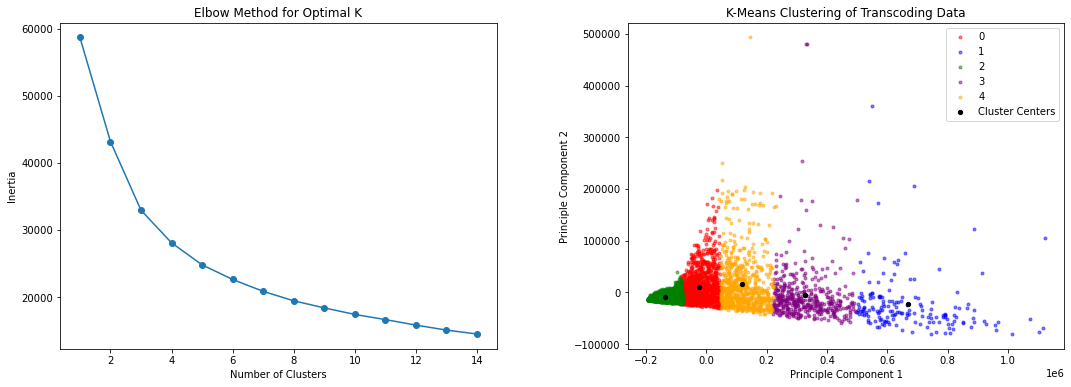

In [5]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
fig = plt.figure(figsize=(18,6))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

# 1) Choose the optimum cluster value 
# Standardizing the data
scaler = StandardScaler()
transcoding_copy_scaled = scaler.fit_transform(transcoding_copy)

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(transcoding_copy_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
ax1 = fig.add_subplot(121)
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
ax1.plot(frame['Cluster'], frame['SSE'], marker='o')
ax1.set_title('Elbow Method for Optimal K')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')

# 2) reduce the data down to two dimensions 
ax2 = fig.add_subplot(122)
pca = PCA(n_components=2)
transcoding_reduced = pca.fit_transform(transcoding_copy)

kmc = KMeans(n_clusters=5, random_state=0)
kmc_model = kmc.fit(transcoding_reduced)

colors=["red","blue","green","purple","orange"]
# plotting with different coloured clusters and showing cluster centres
for i in range(np.max(kmc_model.labels_)+1):
    ax2.scatter(transcoding_reduced[kmc_model.labels_==i][:,0], transcoding_reduced[kmc_model.labels_==i][:,1], label=i, c=colors[i], alpha=0.5, marker='.')
ax2.scatter(kmc_model.cluster_centers_[:,0], kmc_model.cluster_centers_[:,1], label='Cluster Centers', c="black", s=18)         
ax2.set_title('K-Means Clustering of Transcoding Data')
ax2.set_xlabel('Principle Component 1')
ax2.set_ylabel('Principle Component 2')
ax2.legend()

plt.show()

# YOUR RESPONSE HERE
Here, we use 'duration', 'bitrate', 'width', 'height', 'framerate', 'i', 'p', 'b', 'o_framerate', 'o_resolution', 'umem' and 'utime' attributes to cluster the dataset of transcoded videos. As can be seen in the above descriptive statistics, there is a lot of variation in the magnitude of the data. Variables like framerate and o_framerate have low magnitude whereas variables like duration, bitrate, p, umem, etc. have a higher magnitude. Since K-Means is a distance-based algorithnm, we need to bring all the variables to the same magnitude in order to slove the problem caused by the difference of magnitude. After that, plot an elbow curve to determine the optimal number of clusters. It can be seen in the above elbow curve the optimum cluster value is between 4 and 8. We can choose 5 clusters and fit the model. 

# Reference 
[1] Sharma, P. (2020, October 18). The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

### 1.3 Analysing the Clusters <span style= 'float: right;'><b>[10 marks]</b></span>

With your clustering model complete, analyse the outputs in preparation for showing the results to the procurement team. Create a DataFrame for each cluster's data and identify their main attributes - how do these clusters differ from each other. Provide a brief commentary of the clustering model based on the analysis along with a visualisation of the mean `umem` and `utime` across the different clusters.

**Note:** Your analysis should include the mean and deviation of the continuous variables, mode of the categorical variables, and size of each cluster.

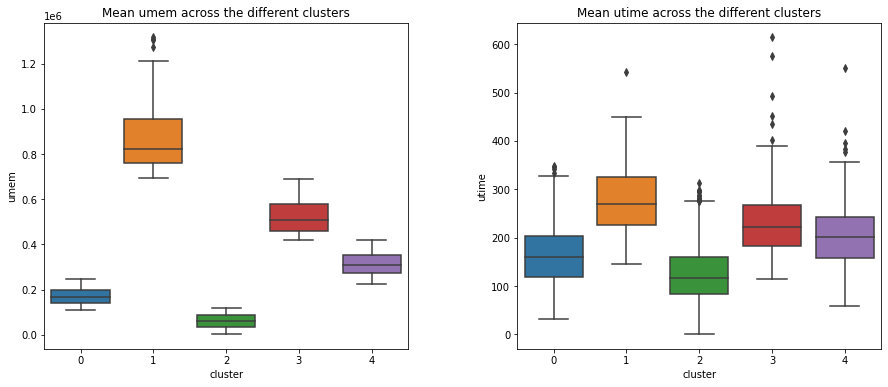

,duration,bitrate,width,height,framerate,i,p,b,o_framerate,o_resolution,umem,utime,cluster
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.0
mean,1730.047945,520.211568,488.053272,321.710807,24.596195,538.159817,37282.171233,167.408676,20.908805,3.525875,171417.306870,164.405004,0.0
std,1628.023954,523.008226,261.319110,152.877239,7.042011,453.518396,31387.217530,152.428684,6.776846,1.716729,35039.246147,59.018208,0.0
min,5.000000,9.000000,154.000000,144.000000,6.000000,0.000000,209.000000,0.000000,12.000000,1.000000,110146.972164,31.606552,0.0
25%,668.000000,268.250000,320.000000,240.000000,24.000000,224.250000,16784.250000,51.250000,15.000000,2.000000,141957.256497,118.877980,0.0
50%,1275.500000,350.000000,426.000000,240.000000,29.460000,427.000000,29402.500000,136.000000,24.000000,4.000000,167959.439999,159.681464,0.0
75%,2347.500000,631.000000,640.000000,480.000000,29.970000,717.000000,48271.750000,229.000000,25.000000,5.000000,198896.431104,203.648554,0.0
max,15997.000000,4786.000000,1280.000000,1080.000000,35.250000,3342.000000,228194.000000,1041.000000,29.970000,6.000000,246153.320758,348.880337,0.0


In [6]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
fig = plt.figure(figsize=(15,6))    # changes the output plotting size
fig.subplots_adjust(wspace=0.3, hspace=0.3)    # increases the distance between subplots

# Create a DataFrame for each cluster's data
pred = kmc_model.predict(transcoding_reduced)
transcoding_copy['cluster'] = pred

cluster0 = pd.DataFrame(transcoding_copy[transcoding_copy['cluster'] == 0])
cluster1 = pd.DataFrame(transcoding_copy[transcoding_copy['cluster'] == 1])
cluster2 = pd.DataFrame(transcoding_copy[transcoding_copy['cluster'] == 2])
cluster3 = pd.DataFrame(transcoding_copy[transcoding_copy['cluster'] == 3])
cluster4 = pd.DataFrame(transcoding_copy[transcoding_copy['cluster'] == 4])

# 1) Visualisation of the mean 'umem' across the different clusters 
ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=transcoding_copy['cluster'], y=transcoding_copy['umem'])
ax1.set_title('Mean umem across the different clusters')

# 2) Visualisation of the mean 'utime' across the different clusters 
ax2 = fig.add_subplot(122)
ax2 = sns.boxplot(x=transcoding_copy['cluster'], y=transcoding_copy['utime'])
ax2.set_title('Mean utime across the different clusters')

plt.show()

# Create a DataFrame for each cluster's data and identify their main attributes
cluster0.describe()

In [7]:
cluster1.describe()

,duration,bitrate,width,height,framerate,i,p,b,o_framerate,o_resolution,umem,utime,cluster
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.0
mean,1921.389535,4239.482558,1742.093023,995.581395,28.287907,641.366279,51828.622093,121.598837,21.296221,3.633721,8.646424e+05,277.628128,1.0
std,2044.228659,1952.717963,285.092029,172.138966,3.569453,693.027910,54110.027638,190.857335,6.784933,1.709835,1.398140e+05,69.905187,0.0
min,6.000000,363.000000,1080.000000,720.000000,6.000000,6.000000,215.000000,0.000000,12.000000,1.000000,6.952017e+05,145.822294,1.0
25%,935.750000,2744.750000,1280.000000,990.000000,25.000000,291.250000,25030.750000,26.000000,15.000000,2.000000,7.617957e+05,226.626940,1.0
50%,1304.000000,4343.500000,1920.000000,1080.000000,29.970000,451.500000,35644.000000,55.000000,24.000000,4.000000,8.217062e+05,268.924585,1.0
75%,2077.250000,5598.750000,1920.000000,1080.000000,29.970000,727.750000,58019.500000,126.750000,25.000000,5.000000,9.541902e+05,326.207005,1.0
max,14460.000000,14502.000000,1920.000000,1920.000000,30.000000,5520.000000,426262.000000,1583.000000,29.970000,6.000000,1.315594e+06,541.803240,1.0


In [8]:
cluster2.describe()

,duration,bitrate,width,height,framerate,i,p,b,o_framerate,o_resolution,umem,utime,cluster
count,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.0
mean,647.671245,257.101462,302.525476,218.477625,19.265512,170.948161,10671.801063,52.625609,20.914116,3.423128,61059.675266,124.395977,2.0
std,594.753808,246.515385,159.150355,99.930670,8.321390,133.017668,8202.161397,42.980825,6.669357,1.692038,30488.433050,54.057983,0.0
min,2.000000,14.000000,128.000000,96.000000,0.000000,0.000000,12.000000,0.000000,12.000000,1.000000,3970.361046,0.752315,2.0
25%,251.000000,81.000000,176.000000,144.000000,12.000000,71.000000,4399.000000,21.000000,15.000000,2.000000,35304.097038,82.820581,2.0
50%,513.000000,152.000000,208.000000,180.000000,12.050000,144.000000,8862.000000,42.000000,24.000000,3.000000,59287.611396,116.378371,2.0
75%,838.000000,345.000000,400.000000,240.000000,29.970000,240.000000,15152.000000,75.000000,25.000000,5.000000,86333.949733,159.992579,2.0
max,4836.000000,2133.000000,960.000000,720.000000,49.420000,905.000000,60772.000000,284.000000,29.970000,6.000000,120092.834649,312.649613,2.0


In [9]:
cluster3.describe()

,duration,bitrate,width,height,framerate,i,p,b,o_framerate,o_resolution,umem,utime,cluster
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.0
mean,1683.034483,2328.822989,1307.760920,758.445977,28.119747,570.126437,45250.652874,147.788506,21.871195,3.464368,523697.683707,232.319941,3.0
std,2112.115092,1369.197373,338.755159,184.182422,3.705895,689.451686,50600.287363,218.726512,6.642517,1.752022,74508.673800,67.132019,0.0
min,6.000000,45.000000,176.000000,144.000000,6.000000,0.000000,323.000000,1.000000,12.000000,1.000000,418256.333108,114.129148,3.0
25%,776.500000,1241.000000,1280.000000,720.000000,25.000000,242.500000,21401.000000,43.000000,15.000000,2.000000,460557.931868,182.329398,3.0
50%,1240.000000,2225.000000,1280.000000,720.000000,29.970000,415.000000,34072.000000,89.000000,24.000000,3.000000,508892.108507,221.927292,3.0
75%,1936.000000,3018.500000,1280.000000,720.000000,30.000000,668.000000,53511.000000,170.000000,25.000000,5.000000,577126.015695,267.344298,3.0
max,25845.000000,6674.000000,1920.000000,1280.000000,30.000000,7032.000000,530243.000000,2311.000000,29.970000,6.000000,690197.115223,613.891350,3.0


In [10]:
cluster4.describe()

,duration,bitrate,width,height,framerate,i,p,b,o_framerate,o_resolution,umem,utime,cluster
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.0
mean,2034.529494,1190.141854,838.345506,526.067416,27.107303,699.161517,53002.640449,204.397472,21.607584,3.556180,314363.280298,203.688704,4.0
std,2108.216221,1029.531106,361.747281,194.146047,4.770342,729.026178,53407.050065,241.270945,6.874413,1.694598,48956.763166,63.239152,0.0
min,1.000000,59.000000,160.000000,120.000000,6.000000,3.000000,68.000000,0.000000,12.000000,1.000000,226537.228349,59.273298,4.0
25%,706.000000,482.000000,640.000000,470.000000,25.000000,218.750000,18283.000000,44.000000,15.000000,2.000000,271747.342442,157.418471,4.0
50%,1396.500000,831.000000,640.000000,480.000000,29.970000,489.500000,37509.000000,124.000000,24.000000,4.000000,307022.936718,200.918899,4.0
75%,2647.000000,1422.500000,1280.000000,720.000000,29.970000,916.250000,68808.250000,275.000000,29.970000,5.000000,352697.084139,243.347693,4.0
max,18001.000000,6195.000000,1920.000000,1080.000000,41.250000,7027.000000,530133.000000,2329.000000,29.970000,6.000000,418484.679382,550.887127,4.0


# YOUR RESPONSE HERE

Initial Idea: Firstly, we generate a DataFrame for each cluster's data and then use describe() function to show their descriptive statistics. Also, we plot two boxplots as shown above (i.e. Mean umem across the different clusters and Mean utime across the different clusters) to visualize how these clusters differ from each other. 

Analysis: Most of data are classified as cluster 2 with number of 2257, and cluster 0 takes the second position with the number of 1314. 172, 435 and 712 data are classified as cluster 1, cluster 3 and cluster 4 respectively. From the Mean umem across the different clusters plot, it can be seen that cluster 1 has the highest mean umem value, while the cluster 2 has the lowest mean umem value. There exits some outliers in the cluster 1 in the mean umem plot, and it has the largest standard deviation of umem with the number of 139814. Similarly, cluster 1 has the highest mean utime value (i.e. around 278), and cluster 2 has the lowest mean utime (i.e. about 124). Cluster 1 has approximately 70 standard deviation of utime which is the largest standard deviaton compared to other clusters.  

*****
## Q2: KNN Classification for Video Transcoding <span style= 'float: right;'><b>[20 marks]</b></span>

The rental company has decided that they want to use simple machine learning to allocate cost tags based on the transcoding score to the transcoded videos. The transcoding score can be obtained by taking the average of `umem` and `utime` and then normalizing it. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Transcoding Score is between 0.0 and 0.3   |
|  Moderate                |  Transcoding Score is between 0.3 and 0.7 |
|  Expensive               |  Transcoding Score is between 0.7 and 1.0 |


**Note:** The `Classification` variable is an ordinal categorical variable whose ordering is Cheap $\prec$ Moderate $\prec$ Expensive where the relation $a \prec b$ states that the variable $a$ precedes $b$.




**Your task is to implement a `K-Nearest Neighbours Classification Algorithm` that can predict the transcoding score of a video**. 

You are required to perform the following tasks:

1. Use the same transcoding_data dataset as the previous question.
2. Modify the dataset to create the `Transcoding Score` column by manually determining the prediction class for existing data (where the rating is within the classification system defined above)
3. Implement an algorithm that can predict the `Transcoding Score` using the features present in the transcoding_data dataset.
4. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `umem` and `utime` of the transcoded video. Various attributes relating to the characteristics of the video and their respective transcoding settings in the tables can be helpful while making the algorithm. If required, you can also look to make new compound attributes that may be helpful in increasing the accuracy of your model.

You are expected to **verbally and visually (wherever approriate)** justify all aspects of your answer, including the features used, the metrics provided and the validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 

In [11]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
# Define a function which classifies the Transcoding Score
# Cheap: 0.0<= Transcoding Score < 0.3 || Moderate: 0.3<= Transcoding Score < 0.7 || Expensive: 0.7<= Transcoding Score <=1.0

def transcodingClassify(var):
    if 0 <= var < 0.3:
        var = "Cheap"
    elif 0.3<= var < 0.7:
        var = "Moderate"
    else:
        var = "Expensive"
    
    return var

The accuracy of using knn classfiction algorithm is 94.99%
Classification accuracy is: 
 [[0.86503067 0.         0.01738241]
 [0.         0.         0.00306748]
 [0.02760736 0.00204499 0.08486708]]
Confusion Matrix is: 
 [[846   0  17]
 [  0   0   3]
 [ 27   2  83]]
Classification report is: 
               precision    recall  f1-score   support

       Cheap       0.97      0.98      0.97       863
   Expensive       0.00      0.00      0.00         3
    Moderate       0.81      0.74      0.77       112

    accuracy                           0.95       978
   macro avg       0.59      0.57      0.58       978
weighted avg       0.95      0.95      0.95       978



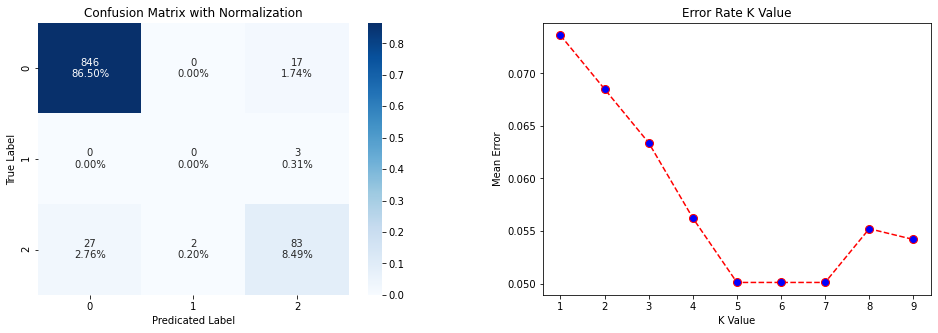

In [12]:
fig = plt.figure(figsize=(16,5))    # changes the output plotting size
fig.subplots_adjust(wspace=0.3, hspace=0.3)    # increases the distance between subplots

# Normalizing the 'Transcoding Score' (i.e. the average of 'umem' and 'utime')
transcoding_copy['Transcoding Score'] = (transcoding_copy['umem']+transcoding_copy['utime'])/2   # the average of 'umem' and 'utime'
data = (np.array(transcoding_copy['Transcoding Score'])).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(data)
data_transformed = scaler.transform(data)
transcoding_copy['Transcoding Score'] = data_transformed # Transform the 'Transcoding Score' within [0,1] -- normalizing
transcoding_copy['Transcoding Score'] = transcoding_copy['Transcoding Score'].apply(transcodingClassify) # Classify the 'Transcoding Score'

X = transcoding_copy[['duration', 'width', 'height', 'framerate', 'i', 'p', 'b', 'o_resolution']]
y = transcoding_copy['Transcoding Score']  # categoried Transcoding Score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
standardScaler = StandardScaler()
standardScaler.fit(X_train) # normalize the X_train data

X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("The accuracy of using knn classfiction algorithm is", "{}%".format(round(knn.score(X_test, y_test), 4)*100))

# Make predictions on the test data
y_pred = knn.predict(X_test)
# Visualize the confusion matrix
ax1 = fig.add_subplot(121)
print("Classification accuracy is: \n", confusion_matrix(y_test, y_pred, normalize='all'))
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is: \n", cf_matrix)
print("Classification report is: \n", classification_report(y_test, y_pred))

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(3,3)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='Blues')
ax1.set_title("Confusion Matrix with Normalization")
ax1.set_xlabel("Predicated Label")
ax1.set_ylabel("True Label")

# Calculate and plot the mean of error for all the predicted values where K range from 1 to 10
ax2 = fig.add_subplot(122)

error = []
# Calculating error for K values between 1 and 10
for i in range(1, 10):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train, y_train)
    pred_i = Knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

ax2.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=8)
ax2.set_title('Error Rate K Value')
ax2.set_xlabel('K Value')
ax2.set_ylabel('Mean Error')
        
plt.show()  

# Previous attributes trying & its corresponding score 
# 1) ['duration', 'bitrate', 'width', 'height', 'framerate', 'i', 'p', 'b', 'o_framerate', 'o_width', 'o_height', 'o_resolution'] -- 0.941717791411043
# 2) ['duration', 'bitrate', 'width', 'height', 'framerate', 'i', 'p', 'b', 'o_framerate', 'o_resolution'] -- 0.9458077709611452
# 3) ['duration', 'bitrate', 'width', 'height', 'framerate', 'i', 'p', 'b', 'o_resolution'] -- 0.9478527607361963
# 4) ['bitrate', 'width', 'height', 'framerate', 'i', 'p', 'b', 'o_resolution'] -- 0.9488752556237219
# 5) ['duration', 'width', 'height', 'framerate', 'i', 'p', 'b', 'o_resolution'] -- 0.9498977505112475 

# YOUR RESPONSE HERE

By trying different combinations of attributes, we find the above attribute combination gives the highest accuracy but with less features.

From the confusion matrix with normalization plot, the rows are actual values, and the columns are prediction values. The main diagonal (846, 0, 83) gives the correct predictions. That is, the cases where the actual values equals the prediction values that the model predicts. The first row are the actual Cheap, and the model predicts 846 of these correctly and incorrectly predicts 17 of them to be Moderate. Looking at the Cheap column, of the 873 Cheap are predicted by the model (i.e. sum of the column Cheap = 846 + 27), 864 are actually Cheap, while 27 Moderate are incorrectly predicted to be Cheap. It can be seen that most of data are classified as Cheap. The accuracy of this KNN classification algorithm is around 95%, which means that the predict model is quite good to some extent. In addition, Cheap has high precison and recall values with the number of 97% and 98% respectively. 

Moreover, the Error Rate K Value plot shows that the mean error is around zero when the value of the K is between 5 and 7. It demonstrates that when K=5, the model yields a good prediction. 

Overall, the model fitted is good, and the KNN algorithm is easy to implement. New data can be added seamlessly since the algorithm requires no training before making prediction. However, as the cost of calculating distance between new point and each exsiting point becomes higher in large datasets, the KNN algorithm has a high prediction cost for large datasets. It means that the KNN algorithm doesn't work well with categorical features to some extent due to the difficulty of finding the distance between dimensions with categorical features.

# Reference 
[1] T, D. (2020, January 29). Confusion Matrix Visualization - Dennis T. Medium. https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
[2] How to understand confusion matrix for 3x3. (2017, December 14). Cross Validated. https://stats.stackexchange.com/questions/318780/how-to-understand-confusion-matrix-for-3x3
[3] Robinson, S. (n.d.). K-Nearest Neighbors Algorithm in Python and Scikit-Learn. Stack Abuse. Retrieved May 18, 2021, from https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

*****
## Q3: Decision Trees for Digital Sky <span style= 'float: right;'><b>[20 marks]</b></span>

The SDSS.csv data consists of 10,000 observations of space taken by the Sloan Digital Sky Survey, which offers public data of space observations. Every observation is described by 17 feature columns and 1 class column, which identifies it as either a star, galaxy or quasar.

To ease your start with the data, you can read the feature descriptions in the [SDSS Description](./data/SDSS_Description.txt) file.

**Your task is to implement a `Decision Tree Classification Algorithm` that can predict the `class` of an image**.

You are required to perform the following tasks:

1. Import the SDSS dataset and perform preprocessing as required.
2. Create a new feature (or column) called `category` by converting the nominal categorical variable `class` into an ordinal categorical variable based on the table presented below:

|  **class**      |  **category**        |
|--------------------------|------------------------- |
|  STAR                   |  0   |
|  GALAXY                |  1 |
|  QSO               |  2 |


3. Implement an algorithm that can predict the `category` using the features present in the SDSS dataset.
4. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.
5.  Plot the resulting Decision Tree produced by the Tree-Building algorithm.

The QSO class refers to the quasi-stellar object, quasar. The order assigned to the `class` categorical variable is based on the brightness of the object, i.e. QSO is brighter than a GALAXY, and a GALAXY is brighter than a STAR.

You are welcome to use any features within the dataset, except the `class` of the SDSS data. If required, you can also look to make new compound attributes that may help increase the accuracy of your model. You are expected to **verbally and visually** justify all aspects of your answer, including the features used, the metrics provided and the validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 

In [13]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
# 1. Import the SDSS dataset and perform preprocessing
SDSS_df = pd.read_csv('data/SDSS.csv')
# 1) Drop the irrelevent columns
SDSS_df.drop(['objid', 'rerun'], axis=1, inplace=True)
# 2) Check the dataset for any missing values and account for them.
SDSS_df.info()

# 2. Create a new feature called 'category' 
SDSS_df['category'] = SDSS_df['class'].map({'STAR':0, 'GALAXY':1, 'QSO':2})
SDSS_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         10000 non-null  float64
 1   dec        10000 non-null  float64
 2   u          10000 non-null  float64
 3   g          10000 non-null  float64
 4   r          10000 non-null  float64
 5   i          10000 non-null  float64
 6   z          10000 non-null  float64
 7   run        10000 non-null  int64  
 8   camcol     10000 non-null  int64  
 9   field      10000 non-null  int64  
 10  specobjid  10000 non-null  float64
 11  class      10000 non-null  object 
 12  redshift   10000 non-null  float64
 13  plate      10000 non-null  int64  
 14  mjd        10000 non-null  int64  
 15  fiberid    10000 non-null  int64  
dtypes: float64(9), int64(6), object(1)
memory usage: 1.2+ MB


,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,category
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491,0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246,1
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228,1
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622,0
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229,1


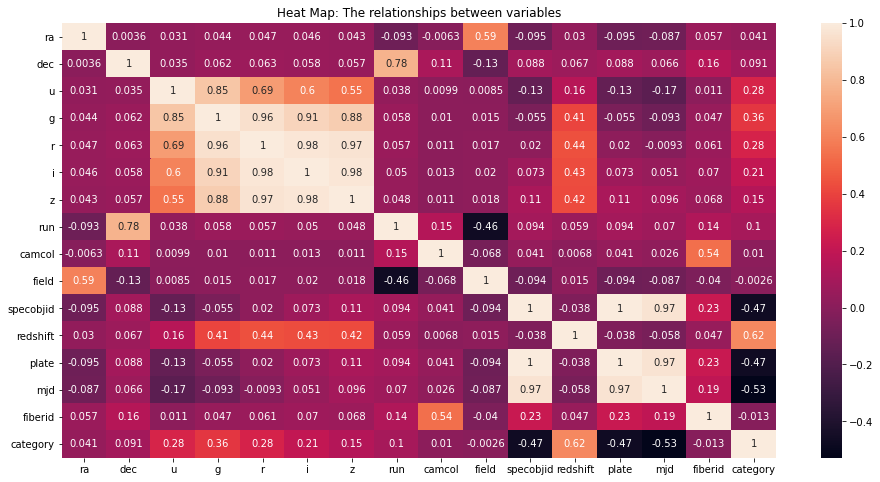

In [14]:
# Features selection process  
# 1) Find the relationships between variables
plt.figure(figsize=(16,8))
corr = SDSS_df.corr()
sns.heatmap(corr, annot=True)

plt.title("Heat Map: The relationships between variables")
plt.show()

In [15]:
# 2) Descriptive statistics
SDSS_df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid,category
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400,0.669800
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149,0.625465
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000,0.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000,0.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000,1.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000,1.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000,2.000000


In [16]:
# 3. Implement an algorithm that can predict the category
# choose columns 
feature_cols = ['ra', 'dec','g', 'r', 'z', 'run', 'field', 'plate']
X = SDSS_df[feature_cols]
y = SDSS_df['category']

# 4. Perform independent testing of the model and provide statistical metrics 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
SDSS_tree = dt.fit(X_train, y_train)
y_pred = SDSS_tree.predict(X_test)

print("Confusion Matrix is: \n", confusion_matrix(y_test, y_pred))
print("Classification report is: \n", classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Training Score:", SDSS_tree.score(X_train, y_train))
print("Testing Score: ", SDSS_tree.score(X_test, y_test))

Confusion Matrix is: 
 [[680 136  16]
 [ 43 940  16]
 [ 41  19 109]]
Classification report is: 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       832
           1       0.86      0.94      0.90       999
           2       0.77      0.64      0.70       169

    accuracy                           0.86      2000
   macro avg       0.84      0.80      0.82      2000
weighted avg       0.86      0.86      0.86      2000

Accuracy: 0.8645
Training Score: 0.864375
Testing Score:  0.8645


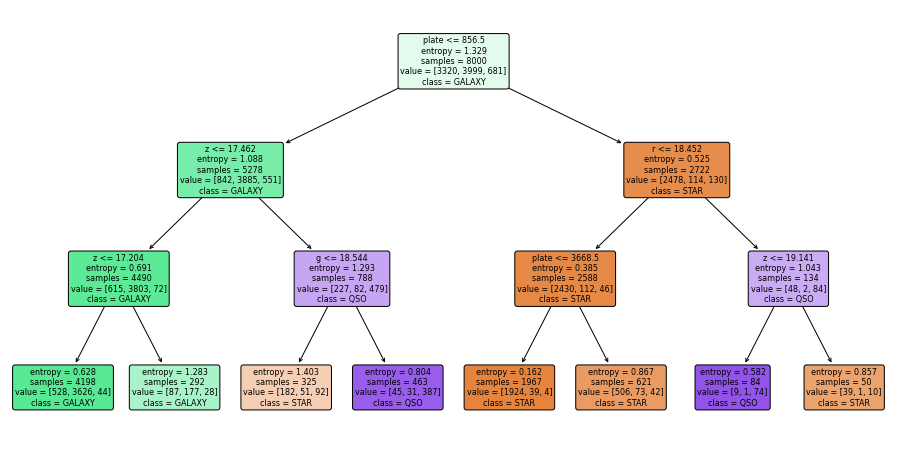

In [17]:
# 5. Plot the resulting Decision Tree produced by the Tree-Building algorithm.
fig = plt.figure(figsize=(16, 8))
target_names = SDSS_df['class'].unique()
tree.plot_tree(SDSS_tree, fontsize=8, feature_names=feature_cols, class_names=target_names, filled=True, rounded=True)
plt.show()

# YOUR RESPONSE HERE

In order to implement an algorithm that can predict the category, we firstly need to select features of the SDSS dataset. Before looking into any interesting features, a Heat Maps is generated to find the relationships between these variables. The numbers in the Heat Maps illustrate the strength of the correlation among variables. After that, a descriptive statistics is generated consisting of count, mean, standard deviation, min, max, and interquartile measures. We can select attributes which has large standard deviation to plot a decison tree by using calssification trees algorithnm. 

From the above tree, starting from the root node, we move to the left subtree if the plate value is not greater than 856.5; otherwise, we move to the right subtree. By doing the same process, once we reach the leaf node, the node tells us the predicted outcome. For example, if a plate value is 800 and its z value is 15, then it is a GALAXY class. Additonally, as can be seen in the print outputs, the accuracy of the model is about 86.45%, which is not bad. The F1 score is 86% that is the weighted average of precision and recall, taking both false positives and false negatives into account. It is usually more useful than accuracy, but it is not easy to understand as accuracy. Overall, the model fitted is not bad. 

Decision trees can be used to predict both continuous and discrete value well for both regression and classification tasks. Less effort is required for the training the algorithnm. A decision tree does not require normalization of data and scaling of data as well. However, it generally leads to overfitting of the data which may ultimately lead to wrong predictions. Also, it causes instability, that is, a small change in the data can cause a large change in the structure of the decision tree. 


# Reference
[1] Robinson, S. (n.d.-a). Decision Trees in Python with Scikit-Learn. Stack Abuse. Retrieved May 20, 2021, from https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
[2] 1.10. Decision Trees — scikit-learn 0.24.2 documentation. (n.d.). Scikit-Learn. Retrieved May 20, 2021, from https://scikit-learn.org/stable/modules/tree.html
[3] Exsilio Consulting. (n.d.). Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures. Exsilio Blog. Retrieved May 20, 2021, from https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
[4] Kumar, N., Kumar, N., & Profile, V. M. C. (2019, February 24). Advantages and Disadvantages of Decision Trees in Machine Learning. The Professionals Point. http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of.html

*****
## Q4: Serious SQL <span style= 'float: right;'><b>[20 marks]</b></span>
Consider the following scenario.

> You are applying for a job as a database developer for an unnamed wrestling company. Part of the job description includes creating an automation system for running SQL queries. During the hiring process, the interviewers want to ensure you understand the SQL language. They have provided a set of questions to be answered by you, and your responses will later be reviewed by them. They are unwilling to give you access to their real database (which is mysteriously missing), so they have provided an SQLite3 database and asked you to interact with it using Python. 


Based on the above scenario, you have been asked to answer a number of questions to test your skills. You will be using the Northwind database for this question. The database model is as follows:

![Northwind_Database](./img/er_diagram.png)

In the following questions, you will be asked to execute the SQL statement, and explain any reasoning as necessary. Data can be formatted as raw printed output or a Pandas DataFrame. Recall the use of the `fetchone` and `fetchall` functions on an sqlite cursor for retriving information.

In [18]:
# THIS IS YOUR CONNECTION BLOCK, DO NOT MODIFY THIS. 
# OTHERWISE, YOU WILL NOT BE ABLE TO READ THE DATABASE
def create_connection():
    """ create a database connection to a database that resides
        in the memory
    """
    conn = None
    try:
        conn = sqlite3.connect(':memory:')
        print("Connection established!")
        
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

northwind_sql = 'data/northwind.sql'
conn = create_connection() 
cur = conn.cursor()
qry = open(northwind_sql, 'r').read()
cur.executescript(qry)
conn.commit()
# remember to close the connection when everything is done

Connection established!


In [19]:
def execute_sql(query):
    # Select table and display
    cur.execute(query)

    # Fetches all the rows from the result of the query
    rows = cur.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in cur.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

In [20]:
# Convert the .sql file into .csv file, which is useful to check whether we execute the SQL statement as we expected or not
Customers_query = "SELECT * FROM Customers;"
Customers = pd.read_sql_query(Customers_query, conn)
Customers.to_csv("Customers.csv", index=False)

Products_query = "SELECT * FROM Products;"
Products = pd.read_sql_query(Products_query, conn)
Products.to_csv("Products.csv", index=False)

Category_query = "SELECT * FROM Categories;"
Categories = pd.read_sql_query(Category_query, conn)
Categories.to_csv("Categories.csv", index=False)

Suppliers_query = "SELECT * FROM Suppliers;"
Suppliers = pd.read_sql_query(Suppliers_query, conn)
Suppliers.to_csv("Suppliers.csv", index=False)

Orders_query = "SELECT * FROM Orders;"
Orders = pd.read_sql_query(Orders_query, conn)
Orders.to_csv("Orders.csv", index=False)

Order_query = "SELECT * FROM 'Order Details';"
Order_details = pd.read_sql_query(Order_query, conn)
Order_details.to_csv("OrderDetails.csv", index=False)

# Reference: 
# [1] loading table from mysql to csv format using python | Data Science and Machine Learning. (n.d.). Kaggle. Retrieved May 21, 2021, from https://www.kaggle.com/questions-and-answers/54953

### 4.1: Customised Customers <span style= 'float: right;'><b>[3 marks]</b></span>

Retrieve the details of all the customers whose `ContactTitle` is Owner or is located in the `Country` Mexico. 

In [21]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
tracks_query = """SELECT CustomerID, CompanyName, ContactName, ContactTitle, Address, City, Region, PostalCode, Country, Phone, Fax FROM Customers 
                      WHERE ContactTitle == 'Owner' OR Country == 'Mexico';"""
execute_sql(tracks_query)

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
1,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
2,BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
3,BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
4,CENTC,Centro comercial Moctezuma,Francisco Chang,Marketing Manager,Sierras de Granada 9993,México D.F.,None,05022,Mexico,(5) 555-3392,(5) 555-7293
5,CHOPS,Chop-suey Chinese,Yang Wang,Owner,Hauptstr. 29,Bern,None,3012,Switzerland,0452-076545,None
6,DUMON,Du monde entier,Janine Labrune,Owner,"67, rue des Cinquante Otages",Nantes,None,44000,France,40.67.88.88,40.67.89.89
7,FOLKO,Folk och fä HB,Maria Larsson,Owner,Åkergatan 24,Bräcke,None,S-844 67,Sweden,0695-34 67 21,None
8,GROSR,GROSELLA-Restaurante,Manuel Pereira,Owner,5ª Ave. Los Palos Grandes,Caracas,DF,1081,Venezuela,(2) 283-2951,(2) 283-3397
9,LETSS,Let's Stop N Shop,Jaime Yorres,Owner,87 Polk St. Suite 5,San Francisco,CA,94117,USA,(415) 555-5938,None


### 4.2: Customers With No Orders <span style= 'float: right;'><b>[3 marks]</b></span>
There are some customers who have never actually placed an order. Show these customers.

In [22]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
tracks_query = """SELECT Customers.CustomerID, ContactName FROM Customers
                    LEFT JOIN Orders ON
                      Customers.CustomerID = Orders.CustomerID
                    WHERE OrderID IS NULL;"""
execute_sql(tracks_query)

,CustomerID,ContactName
0,FISSA,Diego Roel
1,PARIS,Marie Bertrand


### 4.3: Products & their Categories <span style= 'float: right;'><b>[3 marks]</b></span>

Count the total quantity sold for each products. Retrieve the `ProductID`, `ProductName`, `CategoryName`, and the total quantity sold as `Total Sold`.

In [23]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
tracks_query = """SELECT od.ProductID, ProductName, CategoryName, SUM(Quantity) AS 'Total Sold'
                  FROM 'Order Details' AS od
                  LEFT JOIN Products ON od.ProductID = Products.ProductID
                  LEFT JOIN Categories ON Products.CategoryID = Categories.CategoryID
                  GROUP BY od.ProductID;"""

execute_sql(tracks_query)

,ProductID,ProductName,CategoryName,Total Sold
0,1,Chai,Beverages,828
1,2,Chang,Beverages,1057
2,3,Aniseed Syrup,Condiments,328
3,4,Chef Anton's Cajun Seasoning,Condiments,453
4,5,Chef Anton's Gumbo Mix,Condiments,298
...,...,...,...,...
72,73,Röd Kaviar,Seafood,293
73,74,Longlife Tofu,Produce,297
74,75,Rhönbräu Klosterbier,Beverages,1155
75,76,Lakkalikööri,Beverages,981


### 4.4: Products Above Average Price <span style= 'float: right;'><b>[3 marks]</b></span>

Retrieve the `ProductName` and `UnitPrice` of all the products whose price is greater than the average price of all the products.

In [24]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

tracks_query = """SELECT UnitPrice, ProductName FROM 'Products' AS p               
                    WHERE p.UnitPrice > (SELECT AVG(UnitPrice) FROM 'Products')
                    GROUP BY p.ProductID;"""

execute_sql(tracks_query)

,UnitPrice,ProductName
0,30.00,Uncle Bob's Organic Dried Pears
1,40.00,Northwoods Cranberry Sauce
2,97.00,Mishi Kobe Niku
3,31.00,Ikura
4,38.00,Queso Manchego La Pastora
5,39.00,Alice Mutton
6,62.50,Carnarvon Tigers
7,81.00,Sir Rodney's Marmalade
8,31.23,Gumbär Gummibärchen
9,43.90,Schoggi Schokolade


### 4.5: Most Expensive Products <span style= 'float: right;'><b>[3 marks]</b></span>

Get the `ProductName` and the `UnitPrice` of the top 10 most expensive products.

In [25]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
tracks_query = """SELECT ProductName, UnitPrice
                     FROM Products
                     ORDER BY UnitPrice DESC
                     LIMIT 10;"""

execute_sql(tracks_query)

,ProductName,UnitPrice
0,Côte de Blaye,263.50
1,Thüringer Rostbratwurst,123.79
2,Mishi Kobe Niku,97.00
3,Sir Rodney's Marmalade,81.00
4,Carnarvon Tigers,62.50
5,Raclette Courdavault,55.00
6,Manjimup Dried Apples,53.00
7,Tarte au sucre,49.30
8,Ipoh Coffee,46.00
9,Rössle Sauerkraut,45.60


### 4.6: Stocktaking Products by Category and Supplier <span style= 'float: right;'><b>[5 marks]</b></span>

Get the total number of units that are in stock for each `ProductCategory` for each `Supplier Continent`. The resulting table should contain three columns: `ProductCategory`, `Supplier Continent`, and `UnitsInStock`.

`Supplier Continent` can be obtained by mapping the values present in `Country` to their relevant continent. The table below contains the list of countries and the continent that they belong to.

|  **Country**      |  **Supplier Continent**        |
|--------------------------|------------------------- |
|  UK, Spain, Sweden, Germany, Norway, Denmark, Netherlands, Finland, Italy, France                   |  Europe   |
|  USA, Canada, Brazil                |  America |
|  Australia, Japan, Singapore               |  Asia-Pacific |

In [26]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

tracks_query = """SELECT cate.CategoryName AS ProductCategory, SUM(p.UnitsInStock) AS UnitsInStock, 
                     (CASE WHEN s.Country IN ('UK', 'Spain', 'Sweden', 'Germany', 'Norway', 'Denmark', 'Netherlands', 'Finland', 'Italy', 'France') THEN 'Europe'
                     WHEN s.Country IN ('USA', 'Canada', 'Brazil') THEN 'America'
                     ELSE 'Asia-Pacific'
                     END) As 'Supplier Continent'
                     FROM Suppliers AS s
                     JOIN Products AS p ON s.SupplierID = p.SupplierID
                     JOIN Categories AS cate ON cate.CategoryID = p.CategoryID
                     GROUP BY CategoryName, [Supplier Continent];"""

execute_sql(tracks_query)

# Reference 
# [1] SQL CASE Statement. (n.d.). W3schools. Retrieved May 21, 2021, from https://www.w3schools.com/sql/sql_case.asp

,ProductCategory,UnitsInStock,Supplier Continent
0,Beverages,203,America
1,Beverages,32,Asia-Pacific
2,Beverages,324,Europe
3,Condiments,372,America
4,Condiments,90,Asia-Pacific
5,Condiments,45,Europe
6,Confections,17,America
7,Confections,29,Asia-Pacific
8,Confections,340,Europe
9,Dairy Products,393,Europe


*****
## Q5: Ethics and Security <span style= 'float: right;'><b>[15 marks]</b></span>




#### 5.1: OkCupid Data Scrape <span style= 'float: right;'><b>[5 marks]</b></span>

While Data Scientists and Data Engineers spend a lot of timing thinking about how to solve a problem, it is important to think about _why_ we solve a problem and what impacts it could have. For the following scenario, provide a written response to the questions.

> In 2016, almost 70,000 Okcupid profiles had their data released onto the Open Science Framework. This place is an online community where people share raw data and collaborate with each other over data sets. Two Danish researchers, Emil Kirkegaard and Julius Daugbjerg-Bjerrekaer, scraped the data with a bot profile on Okcupid and released publicly identifiable information such as age, gender, sexual orientation, and personal responses to the survey questions the website asks when people sign up for a profile. More importantly, the two researchers didn’t feel their actions were explicitly or ethically wrong, because “Data is already public.” This huge data release raised eyebrows and forced questions about the ethics of releasing “already public” data. 

What does big data ethics have to say about already public data? What harms could arise from the outcomes of the two Danish researchers' actions?

Provide examples in your response to the questions.

**NOTE:** Marks will be awarded based on the brevity and clarity of the arguments and not on quantity. Do not exceed more than 300 words.

# YOUR RESPONSE HERE

Although the data is already public, these two researchers scrape the data and use it for unintended purposes. The public is just a 'form', but it still involves some issues. Initially, people may just think that the online community platform is insteresting, and they are willing to share their own ideas. However, now they face their data may be abused due to the unintend disclosure by these two researchers, which violates people's privacy and may bring some potential dangers to these people. For example, users' data such as age, gender, sexual orientation and so on will be used as the basis for data sorting, and may be traced back to other websites. Users may face various insurance companies harassing phone calls, telecom fraud and other problems. Besides, targeted cyber violence may occur under a bad network enviroment circumstance. Moreover, disclosing sexual orientation may lead to some discriminations. 

#### 5.2: Digital Signature <span style= 'float: right;'><b>[8 marks]</b></span>

Consider the following scenario:

> Ray Technologies has outsourced some work to Lux and Kay, and needs them to jointly sign a contract, which it will then also sign. Since all of the parties involved are located in different parts of the world, and this is a frequently occurring scenario, Ray Technologies decides to come up with a method for doing this electronically. The contract has to be signed by both Lux and Kay, and then finally by Ray Technologies. We assume that the contract is transmitted electronically over public channels, so integrity and confidentiality have to be assured. Both Lux and Kay need to be assured that they are both signing the same contract and need to each have a copy of the contract signed by all three parties involved. The contract needs to be non-repudiable and the process has to be efficient.

Describe a method that Ray Technologies can use for this purpose that uses cryptographic techniques and meets the above requirements.

# YOUR RESPONSE HERE
We can use RSA digital signature rather than digital signature for this purpose since digital signature does not provide confidentiality. The RSA public-key cryptosystem provides a digital signature scheme (sign and verify), and its security relies on the difficulty of factoring large composite numbers. Ray Technologies sends its public key to Lux and Kay, so both Lux and Kay have their own private keys and Ray Technologies' public keys. Also, Ray Technologies has Lux and Kay's public keys. The company uses Lux and Kay's public keys to encrypt a message and then sends it to Lux and Kay to sign it. After receiving the contract from the company, they can use their private keys to decrypt and see the contract content and signs it. Even though the contract is intercepted, others cannot decrypt it, which ensures the confidentitality of the contract. When Lux and Kay complete the signature, they send it to other person signs it. Finally, the contract need to be signed by Ray Technologies. Lux and Kay can send it back to the company through digital signature algorithnm. They use a hash function to generate a message digest, and then use their private keys to encrypt and generate a signed message. After that, the company uses the public keys of Lux and Kay to decrypt and see whether the context is modified, as well as whether the contract is sent by Lux and Kay. To prevent tampers from intercepting documents, it will be useful to find a trusted third party "Certificate Authority (CA)" to issue the public key. Once the public key provided by the CA is used, the possibility of tampering the public key can be avoided. 


# Reference
[1] Edpresso Team. (2021, April 23). What is the RSA algorithm? Educative: Interactive Courses for Software Developers. https://www.educative.io/edpresso/what-is-the-rsa-algorithm
[2] Wikipedia contributors. (2021, May 16). RSA (cryptosystem). Wikipedia. https://en.wikipedia.org/wiki/RSA_(cryptosystem)

#### 5.3: Resilient to the future <span style= 'float: right;'><b>[2 marks]</b></span>

As technology evolves, so does the need for secure cryptographic algorithms. With the introduction of quantum computing, the organisations around the world are preparing to migrate towards quantum resistant algorithms.

Briefly explain why there is a need for quantum-resistant cryptographic algorithms.

# YOUR RESPONSE HERE

The security of cryptography relies on certain "hard" problems, a "hard" problem should take the best computers available billions of years to slove. The most widely used PKC systems such as RSA rely on the intractability of integer factorization and discrete log problems. These problems are difficult for classical computers to slove, but easy for quantum computers. It means that we will not be able to reply on the security of any scheme with a large-scale universal quantum computer is built. 

Quantum computers have ability to slove complex problems, but may be applied to undermine cybersecurity in turn. The threat to public key cryptography that is based on factorisation for RSA algorithms, or discrete log problems with DSA, Diffie-Hellman, and ECC is one of particular concerns. Although these mathematical problems are sufficient today, a quantum computer running quantum algorithms could break these codes in a matter of hours. To mitigate this risk, organisations must turn to post-quantum encryption security (sometimes referred to as quantum resistant algorithms). 

# Reference
[1] Martin, K. (2019, January 22). Waiting for quantum computing: Why encryption has nothing to worry about. TechBeacon. https://techbeacon.com/security/waiting-quantum-computing-why-encryption-has-nothing-worry-about
[2] Senetas. (2021, May 11). Quantum Resistant Encryption Security. https://www.senetas.com/applications/post-quantum-encryption-security/